In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rectify(h):
    # print h
    h = h.reshape((4,2))
    # print h
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    # print add
    
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

(2448, 3264, 3)


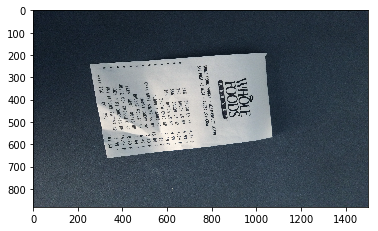

(880, 1500, 3)


In [2]:
# Add image here. Can also use laptop's webcam if the resolution is good enough to capture readable document content
image = cv2.imread('./sample-2.jpg')
print image.shape

# Resize image so it can be processed. Choose optimal dimensions such that important content is not lost
image = cv2.resize(image, (1500, 880))
orig = image.copy()

plt.figure(0)
plt.imshow(image)
plt.show()

print image.shape

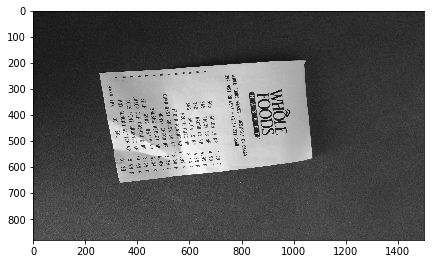

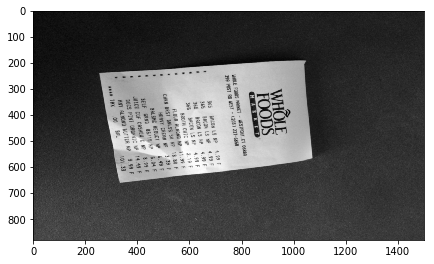

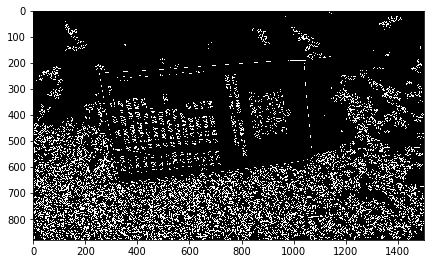

In [4]:
# Step 1: Edge Detection

# 1.1: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(1, figsize=(7,7))
plt.imshow(gray, cmap='gray')

# 1.2: Blurring for Smoothness: Options-> Gaussian Blur, Median Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#blurred = cv2.medianBlur(gray, 5)
plt.figure(2, figsize=(7,7))
plt.imshow(blurred, cmap='gray')

# 1.3: Applying Canny Edge Detection
edged = cv2.Canny(blurred, 0, 50)
plt.figure(3, figsize=(7,7))
plt.imshow(edged, cmap='gray')

plt.show()

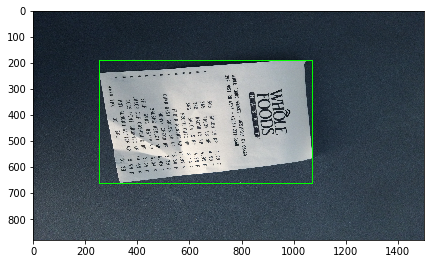

Largest approximate Contour is: 
[[[1048  194]]

 [[ 255  241]]

 [[ 332  660]]

 [[1071  567]]]


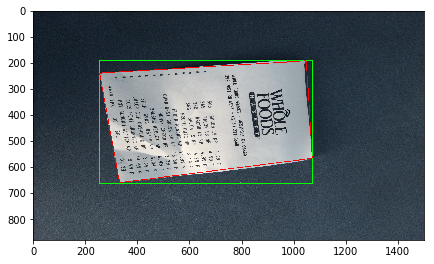

In [5]:
# Step 2: Finding largest contour in Edged Image

# 2.1: Find Contours
# (contours, _) = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
(_, contours, _) = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# 2.2 Sort contours by area in decreasing order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Plotting a bounding rectangle around largest contour for representational purposes
x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
plt.figure(4, figsize=(7,7))
plt.imshow(image, cmap='gray')
plt.show()

# 2.3 Get largest approximate contour with 4 vertices
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * p, True)

    if len(approx) == 4:
        target = approx
        break

print 'Largest approximate Contour is: '
print target

# Plotting the largest contour for representational purposes
cv2.drawContours(image, [target], -1, (255, 0, 0), 2)
plt.figure(5, figsize=(7,7))
plt.imshow(image, cmap='gray')
plt.show()


Largest approximate Contour after rectification is: 
[[  255.   241.]
 [ 1048.   194.]
 [ 1071.   567.]
 [  332.   660.]]

Image Contour after perspective transform is: 


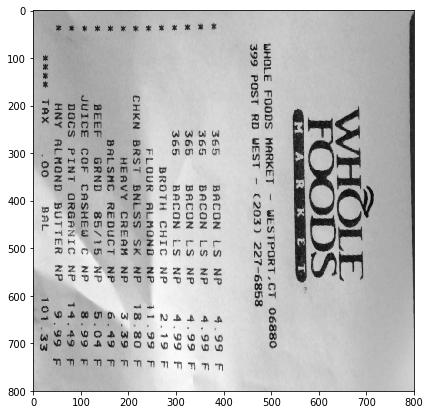

In [6]:
# Step 3: Mapping (Transforming) target points to 800x800 quadrilateral

approx = rectify(target)
print '\nLargest approximate Contour after rectification is: '
print approx

pts2 = np.float32([[0,0],[800,0],[800,800],[0,800]])
M = cv2.getPerspectiveTransform(approx,pts2)
dst = cv2.warpPerspective(orig,M,(800,800))

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
print '\nImage Contour after perspective transform is: '
plt.figure(6, figsize=(7,7))
plt.imshow(dst, cmap='gray')
plt.show()

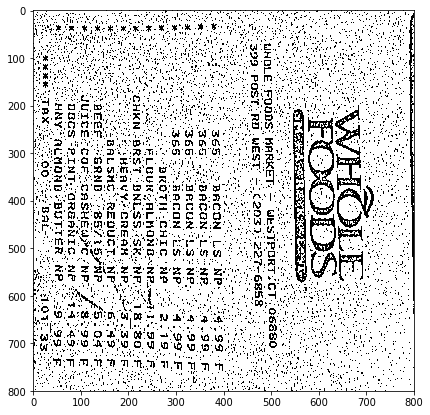

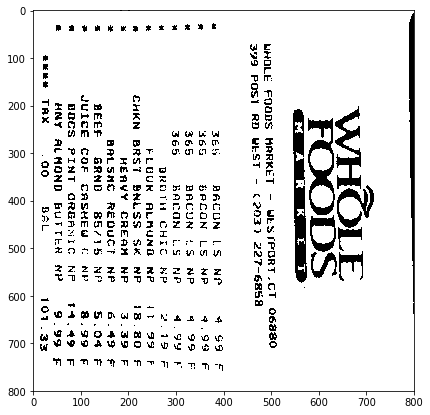

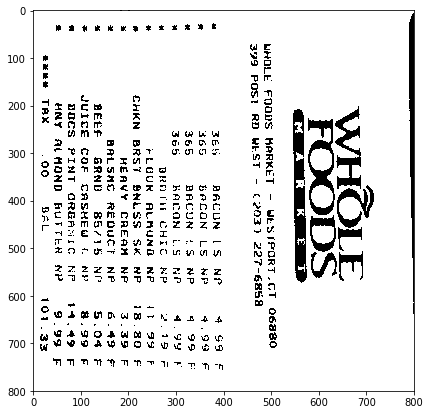

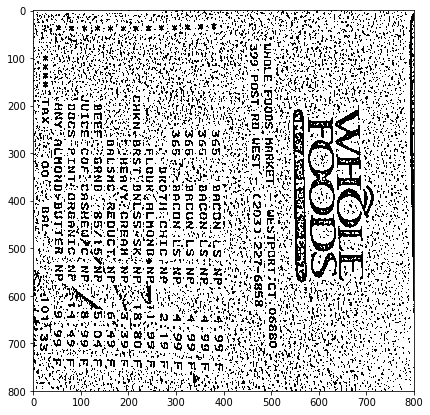

In [7]:
# Step 4: Using thresholding on warped image to get scanned effect (If Required)
ret,th1 = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY)
plt.figure(6, figsize=(7,7))
plt.imshow(th1, cmap='gray')

th2 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.figure(7, figsize=(7,7))
plt.imshow(th2, cmap='gray')

th3 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.figure(8, figsize=(7,7))
plt.imshow(th3, cmap='gray')

ret2,th4 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(9, figsize=(7,7))
plt.imshow(th4, cmap='gray')

plt.show()